### Note:  to start Jupyter Notebook with Spark, use the following command:

PYSPARK_DRIVER_PYTHON="jupyter" PYSPARK_DRIVER_PYTHON_OPTS="notebook --ip localhost --port 7777 --no-browser" pyspark --packages org.diana-hep:spark-root_2.11:0.1.11,org.diana-hep:histogrammar-bokeh_2.11:1.0.3,org.diana-hep:histogrammar-sparksql_2.11:1.0.3

# Root file to Spark Dataframe

Below is the code to read in the root file into a Spark DataFrame.

The show() method can show some of the data in table format

The printSchema() can show the tree structure of the data

count() will display the number of rows

In [1]:
import time
start_time = time.time()

In [2]:
sc.defaultParallelism

16

In [3]:
#df = sqlContext.read.format("org.dianahep.sparkroot").load("file:/home/ethan/Documents/JL_Summer_2017/Root/data_05_53591_53591_03.root")

In [4]:
#add = sqlContext.read.format("org.dianahep.sparkroot").load("file:/home/ethan/Documents/JL_Summer_2017/Root/data_05_53094_53094_01.root")

In [5]:
#df = df.union(add)
#df.count()

In [6]:
#add.count()

# Importing Packages

In [7]:
from math import *
import numpy as np
from pyspark.sql import Row
import matplotlib.pyplot as plt
#import histogrammar as hist
from pyspark.sql.types import ArrayType,FloatType
from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType
#import ROOT

In [8]:
#data = sqlContext.read.format("org.dianahep.sparkroot").load('s3://egbuckuseast2/Root_data/
#data_05_53094_53094_01.root')

#from pyspark import SparkContext
#sc = SparkContext()
#from pyspark.sql import SQLContextdata_05_52843_52843_02.root
#sqlContext = SQLContext(sc)

count = 0
fileList = ["data_05_53094_53094_01.root","data_05_53096_53096_01.root","data_05_53096_53096_02.root",\
            "data_05_53591_53591_03.root","data_05_53137_53137_01.root","data_05_53139_53139_01.root",\
            "data_05_53139_53139_02.root","data_05_53140_53140_01.root","data_05_53140_53140_02.root",\
            "data_05_52822_52822_01.root","data_05_52822_52822_02.root","data_05_52822_52822_03.root",\
            "data_05_52822_52822_04.root","data_05_52823_52823_01.root","data_05_52824_52824_01.root",\
            "data_05_52825_52842_01.root","data_05_52843_52843_02.root","data_05_56180_56180_01.root",\
            "data_05_56080_56080_01.root","data_05_56118_56118_04.root","data_05_56385_56385_01.root",\
            "data_05_56439_56439_02.root","data_05_56511_56511_01.root","data_05_56572_56572_01.root"]
for filename in fileList:
    temp = sqlContext.read.format("org.dianahep.sparkroot").load('s3://egbuckuseast2/Root_data/'+filename)
    if count != 0:
        data = data.union(temp)
    else:
        data = temp
    count+=1

In [9]:
print len(data.columns)
print data.count()
#data.printSchema()

1539
1073099


In [10]:
def cut_rows(sincand,vtxPrim,remc,siprob,siecorr,calEmpz,numTracks,Et1ir,Ntrkvtx,Zvtx):
    if sincand != 0:
        if sum(vtxPrim) == 1:
            if remc[3] > 2:
                if len(siprob) > 0:
                    if max(siprob) > 0.9:
                        if len(siecorr) > 0:
                                #if siecorr[2] > 10:
                                    if calEmpz > 45.0 and calEmpz < 65.0:
                                        if numTracks > 2.0 and numTracks < 5.0:
                                            if Et1ir < 5.0 and Ntrkvtx > 2.0 and abs(Zvtx) < 50.0:
                                                return True
    return False

In [11]:
filter_udf = udf(cut_rows, BooleanType())
sample = data.sample(False,0.99999999999999999999999999999999999)
print sample.count()
df_filtered = sample.filter(filter_udf(sample.Sincand,sample.Vtx_prim,sample.Remc,sample.Siprob,sample.Siecorr,\
                                      sample.Cal_empz,sample.Trk_ntracks,sample.Et1ir,\
                                      sample.Ntrkvtx,sample.Zvtx))
print len(df_filtered.columns)
df_filtered.count()

1073099
1539


6419

In [12]:
MassK=0.493677

panda_df = df_filtered.select("Trk_ntracks","Trk_prim_vtx","Trk_id","Trk_layouter","Sitrknr","Trk_charge","Trk_px",\
                              "Trk_py","Trk_pz","Siprob","Sincand").toPandas()

In [13]:
# Testing

count = 0
for row in panda_df.itertuples():
    #do stuff in here
    if count < 5:
        print row
        print row.Index
        print row.Trk_ntracks
        print type(row.Trk_px)
        print row.Trk_px
        print type(row)
        print
    count += 1

Pandas(Index=0, Trk_ntracks=4, Trk_prim_vtx=[1, 1, 1, 1], Trk_id=[1, 2, 3, 4], Trk_layouter=[1, 1, 0, 0], Sitrknr=[0], Trk_charge=[1.0, -1.0, 1.0, -1.0], Trk_px=[0.06615765392780304, -0.22274655103683472, -0.003180873580276966, 0.038954976946115494], Trk_py=[0.8321015238761902, 0.058434292674064636, 0.2133817970752716, -0.10192040354013443], Trk_pz=[3.404179573059082, 0.9481952786445618, 0.9883790016174316, 0.7635810971260071], Siprob=[0.9991658329963684], Sincand=1)
0
4
<type 'list'>
[0.06615765392780304, -0.22274655103683472, -0.003180873580276966, 0.038954976946115494]
<class 'collections.Pandas'>

Pandas(Index=1, Trk_ntracks=3, Trk_prim_vtx=[1, 1, 1], Trk_id=[1, 2, 3], Trk_layouter=[1, 0, 0], Sitrknr=[0], Trk_charge=[1.0, 1.0, -1.0], Trk_px=[0.08219897747039795, 0.07068424671888351, 0.05522003024816513], Trk_py=[0.10278084874153137, 0.05309213697910309, -0.021359628066420555], Trk_pz=[-0.575204074382782, 0.1447533667087555, 0.36448100209236145], Siprob=[0.9983105659484863], Sincand

In [14]:
print type(panda_df.iloc[1])
print panda_df.iloc[1]
print panda_df.iloc[1].Trk_charge[0]

<class 'pandas.core.series.Series'>
Trk_ntracks                                                     3
Trk_prim_vtx                                            [1, 1, 1]
Trk_id                                                  [1, 2, 3]
Trk_layouter                                            [1, 0, 0]
Sitrknr                                                       [0]
Trk_charge                                       [1.0, 1.0, -1.0]
Trk_px          [0.0821989774704, 0.0706842467189, 0.055220030...
Trk_py          [0.102780848742, 0.0530921369791, -0.021359628...
Trk_pz          [-0.575204074383, 0.144753366709, 0.364481002092]
Siprob                                           [0.998310565948]
Sincand                                                         1
Name: 1, dtype: object
1.0


In [15]:
def InvMassCalc(px1,px2,py1,py2,pz1,pz2,MassK):
    pos1 = sqrt(px1**2+py1**2+pz1**2)
    pos2 = sqrt(px2**2+py2**2+pz2**2)
    kaonCalc1 = sqrt(pos1**2 + MassK**2)
    kaonCalc2 = sqrt(pos2**2 + MassK**2)
    invMass = (px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2
    invMass = sqrt((kaonCalc1+kaonCalc2)**2 - invMass)
    return invMass

In [16]:
panda_df.shape

(6419, 11)

In [17]:
InvMass = []
for row in panda_df.itertuples():
    print "Row %d" %(row.Index)
    siprobMaxIndex = row.Siprob.index(max(row.Siprob))
    Sitrknr = row.Sitrknr[siprobMaxIndex]
    for index1 in range(row.Trk_ntracks):
        print "Index1 %d" %(index1)
        # more filtering
        if row.Trk_prim_vtx[index1] == 1 and Sitrknr != row.Trk_id[index1] and \
        row.Trk_layouter[index1]>=4:
            # second track index
            if index1 != row.Trk_ntracks - 1:
                print "Creating second Index"
                index2 = index1 + 1
                print "Before While loop index2=%d" %(index2)
                print "# of Tracks = %d" %(row.Trk_ntracks)
                while index2 < row.Trk_ntracks:  #while the index is less than the number of tracks of event
                    print "Index2 %d" %(index2)
                    # apply same filtering conditions to second index
                    # and row.Sitrknr[index2]!= row.Trk_id[index2]
                    if row.Trk_prim_vtx[index2] == 1 and Sitrknr != row.Trk_id[index2] and \
                    row.Trk_layouter[index2]>=4:
                        # Make sure not same charge
                        print "made it here"
                        if row.Trk_charge[index1] != row.Trk_charge[index2]:
                            print "should do calc"
                            invMass = InvMassCalc(row.Trk_px[index1],row.Trk_px[index2],row.Trk_py[index1],\
                                                  row.Trk_py[index2],row.Trk_pz[index1],row.Trk_pz[index2],MassK)
                            
                            InvMass.append(invMass)
                    index2 += 1

Row 0
Index1 0
Index1 1
Index1 2
Index1 3
Row 1
Index1 0
Index1 1
Index1 2
Row 2
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 3
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 4
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before Whil

Row 90
Index1 0
Index1 1
Index1 2
Row 91
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 92
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 93
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 94
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index

Row 157
Index1 0
Index1 1
Index1 2
Row 158
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 159
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
made it here
Index1 1
Index1 2
Index1 3
Row 160
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 161
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 162
Index1 0
Index1 1
Index1 2
Row 163
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1

Index1 1
Index1 2
Row 226
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 227
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 228
Index1 0
Index1 1
Index1 2
Index1 3
Row 229
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 230
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 231
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 232
Index1 0
Index1 1
Index1 2
Row 233
Index1 0
Creati

Index1 2
Index1 3
Row 302
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 303
Index1 0
Index1 1
Index1 2
Row 304
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 305
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 306
Index1 0
Index1 1
Index1 2
Index1 3
Row 307
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3

Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 363
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 364
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 365
Index1 0
Index1 1
Index1 2
Index1 3
Row 366
Index1 0
Index1 1
Index1 2
Index1 3
Row 367
Index1 0
Index1 1
Index1 2
Row 368
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 369
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 370
Index1 0
Index1 1
Creatin

Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 429
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 430
Index1 0
Index1 1
Index1 2
Row 431
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 432
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 433
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 434
Index1 0
Index1 1
Index1 2
Index1 3
Row 435
Index1 0
Index1 1
Index1 2
Index1 3
Row 436
Index1 0
Creating second Index
Before While loop ind

Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 496
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 497
Index1 0
Index1 1
Index1 2
Index1 3
Row 498
Index1 0
Index1 1
Index1 2
Index1 3
Row 499
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
mad

made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 577
Index1 0
Index1 1
Index1 2
Index1 3
Row 578
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 579
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
made it here
should do calc
Index1 1
Index1 2
Index1 3
Row 580
Index1 0
Index1 1
Index1 2
Index1 3
Row 581
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 582
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 583
Index1 0
Creat

Index1 2
Row 640
Index1 0
Index1 1
Index1 2
Row 641
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 642
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 643
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 644
Index1 0
Index1 1
Index1 2
Index1 3
Row 645
Index1 0
Index1 1
Index1 2
Row 646
Index1 0
Index1 1
Index1 2
Row 647
Index1 0
Index1 1
Index1 2
Row 648
Index1 0
Index1 1
Index1 2
Index1 3
Row 649
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 650
Index1 0
Creating sec

Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 734
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 735
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 736
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
B

Index2 1
Index2 2
Index1 1
Index1 2
Row 857
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 858
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 859
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 860
Index1 0
Index1 1
Index1 2
Index1 3
Row 861
Index1 0
Index1 1
Index1 2
Index1 3
Row 862
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
should do calc
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 863
Index1 0
Creating second Index
Before Whil

# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 930
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 931
Index1 0
Index1 1
Index1 2
Row 932
Index1 0
Index1 1
Index1 2
Row 933
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 934
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Befor

Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 1011
Index1 0
Index1 1
Index1 2
Row 1012
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1013
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
made it here
should do calc
Index1 2
Index1 3
Row 1014
Index1 0
Index1 1
Index1 2
Row 1015
Index1 0
Index1 1
Index1 2
Row 1016
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made i

Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 1066
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 1067
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 1068
Index1 0
Index1 1
Index1 2
Row 1069
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1070
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks 

Row 1149
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1150
Index1 0
Index1 1
Index1 2
Row 1151
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 1152
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1153
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2

Row 1226
Index1 0
Index1 1
Index1 2
Row 1227
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1228
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1229
Index1 0
Index1 1
Index1 2
Row 1230
Index1 0
Index1 1
Index1 2
Index1 3
Row 1231
Index1 0
Index1 1
Index1 2
Row 1232
Index1 0
Index1 1
Index1 2
Row 1233
Index1 0
Index1 1
Index1 2
Row 1234
Index1 0
Index1 1
Index1 2
Row 1235
Inde

Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 1288
Index1 0
Index1 1
Index1 2
Index1 3
Row 1289
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 1290
Index1 0
Index1 1
Index1 2
Index1 3
Row 1291
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 1292
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 1293
Index1 0
Index1 1
Index1 2
Index1 3
Row 1294
Index1

Row 1391
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 1392
Index1 0
Index1 1
Index1 2
Index1 3
Row 1393
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
made it here
should do calc
Index1 2
Index1 3
Row 1394
Index1 0
Index1 1
Index1 2
Row 1395
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 1396
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating secon

Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 1506
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1507
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1508
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 1509
Index1 0
Creating second 

made it here
should do calc
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1619
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 1620
Index1 0
Index1 1
Index1 2
Index1 3
Row 1621
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1622
Index1 0
Index1 1
Index1 2
Index1 3
Row 1623
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 1624
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should

made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 1666
Index1 0
Index1 1
Index1 2
Index1 3
Row 1667
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 1668
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before Whi

Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1728
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1729
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 1730
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Befo

should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 1823
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
made it here
Index1 2
Index1 3
Row 1824
Index1 0
Index1 1
Index1 2
Index1 3
Row 1825
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks =

Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1934
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 1935
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 1936
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 1937
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made

Index1 2
Row 1992
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1993
Index1 0
Index1 1
Index1 2
Row 1994
Index1 0
Index1 1
Index1 2
Row 1995
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 1996
Index1 0
Index1 1
Index1 2
Row 1997
Index1 0
Index1 1
Index1 2
Row 1998
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 1999
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 2000
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 2001
Index1 0


Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 2056
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 2057
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 2058
Index1 0
Index1 1
Index1 2
Row 2059
Index1 0
Index1 1
Index1 2
Index1 3
Row 2060
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1


Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 2157
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 2158
Index1 0
Index1 1
Index1 2
Row 2159
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 2160
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 2161
Index1 0
Creating sec

Index2 2
Index2 3
Index1 2
Index1 3
Row 2299
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2300
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 2301
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 2302
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 2303
Index

Index1 0
Index1 1
Index1 2
Index1 3
Row 2389
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2390
Index1 0
Index1 1
Index1 2
Index1 3
Row 2391
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 2392
Index1 0
Index1 1
Index1 2
Row 2393
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 2394
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 2395
Index1 0
Index1 1
Index1 2
Index1 3
Row 2396
Index1 0
Creating second Index
Before While loop index2=1


# of Tracks = 4
Index2 3
Index1 3
Row 2475
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 2476
Index1 0
Index1 1
Index1 2
Index1 3
Row 2477
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 2478
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 2479
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 2480
Index1 0
Index1 1
Index1 2
Index1 3
Row 2481
Index1 0
Index1 1
Index1 2
Index1 3
Row 2482
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2483
Index1 0
Ind

made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 2607
Index1 0
Index1 1
Index1 2
Row 2608
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 2609
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 2610
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before

Index1 1
Index1 2
Row 2783
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 2784
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2785
Index1 0
Index1 1
Index1 2
Row 2786
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2787
Index1 0
Index1 1
Index1 2
Row 2788
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
I

# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 2948
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2949
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 2950
Index1 0
Index1 1
Index1 2
Row 2951
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 2952
Inde

Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 3105
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 3106
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
made it here
should do calc
Index1 1
Index1 2
Row 3107
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 3108
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
made it here
should do calc
Index1 1
Index1 2
Index1 3
Row 3109
Index1 0
Index1 1
Index1 2
Index1 3
Row 3110
Index1 0
Index1 1
Index1 2
Row 3111
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
I

Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 3215
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
should do calc
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3216
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3217
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Inde

Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 3356
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3357
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3

Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 3489
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 3490
Index1 0
Index1 1
Index1 2
Row 3491
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 3492
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 3493
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 3494
Index1 0
Index1 1
Index1 2
Index1 3
Row 3495
Index1 0
Creating second Index
Before While loop ind

Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3535
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 3536
Index1 0
Index1 1
Index1 2
Row 3537
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 3538
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3539
Index1 0
Index1 1
Index1 2
Row 3540
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating

made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 3616
Index1 0
Index1 1
Index1 2
Index1 3
Row 3617
Index1 0
Index1 1
Index1 2
Row 3618
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 3619
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3620
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 3621
Index1 0
I

Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3732
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 3733
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 3734
Index1 0
Index1 1
Index1 2
Index1 3
Row 3735
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index

Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 3826
Index1 0
Index1 1
Index1 2
Index1 3
Row 3827
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 3828
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 3829
Index1 0
Index1 1
Index1 2
Index1 3
Row 3830
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 3831
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it 

should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 3943
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 3944
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 3945
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
sho

Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4088
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4089
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4090
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
made it here
Index1 2
Index1 3
Row 4091
Index1 0
Index1 1
Index1 2
Index1 3
Row 4092
Index1 0
Index1 1
Index1 2
Row 4093
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4094
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it

Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 4257
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4258
Index1 0
Index1 1
Index1 2
Index1 3
Row 4259
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
made it here
should do calc
Index1 1
Index1 2
Row 4260
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4261
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Ind

Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 4412
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 4413
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 4414
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row

Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4558
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4559
Index1 0
Index1 1
Index1 2
Index1 3
Row 4560
Index1 0
Index1 1
Index1 2
Index1 3
Row 4561
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4562
Index1 0
Index1 1
Index1 2
Row 4563
Index1 0
Index1 1
Index1 2
Index1 3
Row 4564
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4565
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
shou

Index1 1
Index1 2
Index1 3
Row 4655
Index1 0
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4656
Index1 0
Index1 1
Index1 2
Index1 3
Row 4657
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
made it here
should do calc
Index1 1
Index1 2
Row 4658
Index1 0
Index1 1
Index1 2
Row 4659
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 4660
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
made it here
should do calc
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4661
Index1 0
Index1 1
Index1 2
Row 4662
Index1 0
Index1 1
Index1 2
Row 4663
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4

Index1 0
Index1 1
Index1 2
Index1 3
Row 4779
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 4780
Index1 0
Index1 1
Index1 2
Index1 3
Row 4781
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4782
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before 

Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 4876
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 4877
Index1 0
Index1 1
Index1 2
Row 4878
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 4879
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4880
Index1 0
Index1 1
Index1 2
Index1 3
Row 4881
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
I

Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 4976
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 4977
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 4978
Index1 0
Index1 1
Index1 2
Row 4979
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Ind

Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5061
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 5062
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5063
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1

Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5110
Index1 0
Index1 1
Index1 2
Row 5111
Index1 0
Index1 1
Index1 2
Index1 3
Row 5112
Index1 0
Index1 1
Index1 2
Index1 3
Row 5113
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5114
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 5115
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row

made it here
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 5181
Index1 0
Index1 1
Index1 2
Index1 3
Row 5182
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5183
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5184
Index1 0
Creating second Index
Before While loop i

Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5232
Index1 0
Index1 1
Index1 2
Row 5233
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5234
Index1 0
Index1 1
Index1 2
Row 5235
Index1 0
Index1 1
Index1 2
Row 5236
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 5237
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5238
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
shoul

Index1 2
Row 5274
Index1 0
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5275
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5276
Index1 0
Index1 1
Index1 2
Index1 3
Row 5277
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5278
Index1 0
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5279
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop ind

Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5330
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5331
Index1 0
Index1 1
Index1 2
Row 5332
Index1 0
Index1 1
Index1 2
Index1 3
Row 5333
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5334
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5335
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1

should do calc
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 5459
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5460
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
Index1 2
Row 5461
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5462
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it 

Index1 2
Row 5535
Index1 0
Index1 1
Index1 2
Index1 3
Row 5536
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5537
Index1 0
Index1 1
Index1 2
Row 5538
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5539
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 5540
Index1 0
Index1 1
Index1 2
Index1 3
Row 5541
Index1 0
Index1 1
Index1 2
Row 5542
Index1 0
Index1 1
Index1 2
Row 5543
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While l

should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 5634
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5635
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5636
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index


Index1 2
Index1 3
Row 5731
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5732
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5733
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5734
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5735
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1

Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
made it here
should do calc
Index1 2
Row 5831
Index1 0
Index1 1
Index1 2
Index1 3
Row 5832
Index1 0
Index1 1
Index1 2
Index1 3
Row 5833
Index1 0
Index1 1
Index1 2
Index1 3
Row 5834
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 5835
Index1 0
Index1 1
Index1 2
Row 5836
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 2
Creatin

should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 5961
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5962
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 5963
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
made it here
should do calc
Index2 2
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 3
Index2 2
Index1 2
Row 5964
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 3
Index2 1
Index2 2
Index1 1
Index1 2
Row 5965
Index1 0
Index1 1
Index1 2
Row 5966
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 5967
Index1 0
Index1 1
Index1 2
Row 5968
I

# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 6116
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 6117
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 6118
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 6119
Index1 0
Creating second Index
Before While loop index2=1
# of

Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 6214
Index1 0
Index1 1
Index1 2
Index1 3
Row 6215
Index1 0
Index1 1
Index1 2
Row 6216
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
Index2 2
Index2 3
Index1 1
Index1 2
Index1 3
Row 6217
Index1 0
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 6218
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
made it here
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
should do calc
Index1 3
Row 6219
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should

made it here
should do calc
Index2 3
Index1 1
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
Index1 3
Row 6338
Index1 0
Index1 1
Index1 2
Index1 3
Row 6339
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
made it here
should do calc
Index2 3
made it here
should do calc
Index1 2
Creating second Index
Before While loop index2=3
# of Tracks = 4
Index2 3
made it here
Index1 3
Row 6340
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3
Index1 1
Creating second Index
Before While loop index2=2
# of Tracks = 4
Index2 2
Index2 3
Index1 2
Index1 3
Row 6341
Index1 0
Creating second Index
Before While loop index2=1
# of Tracks = 4
Index2 1
made it here
should do calc
Index2 2
Index2 3

In [18]:
print InvMass
print len(InvMass)

[1.026104218994653, 1.0138620827555227, 1.014132234592949, 1.0972690877338158, 2.3508249917647066, 1.8100465785454687, 1.1195172712929007, 1.0402487972979393, 1.4610340766016976, 1.074505679232996, 1.910487731212257, 1.079182023556052, 1.0105472833034153, 1.241282878140564, 1.173484523134936, 1.0602359353714124, 1.5110970251600662, 1.5373605128321688, 1.2266668803607836, 1.038864618215307, 1.0088728928427249, 1.2221120820001343, 1.0440083564124478, 1.0018637661072047, 4.526174571547884, 1.4694533272908266, 1.0717708949779192, 1.0106303685134466, 1.3366410463819582, 1.1005658628176587, 1.220634143746381, 1.0516095451808918, 1.1501001442212555, 1.0100310465939213, 1.18605957857266, 2.80057177032107, 2.240767814182113, 1.0681225312257898, 1.3492027292390216, 1.3009327422208878, 1.3185272236954042, 1.2529620532140748, 1.0907278237608193, 1.088708566202879, 1.4787898292127089, 1.1079441539440387, 2.3629518127433444, 1.7351352768678643, 1.1167419245815615, 1.2940386817580085, 1.0439187102990

0.987365848219


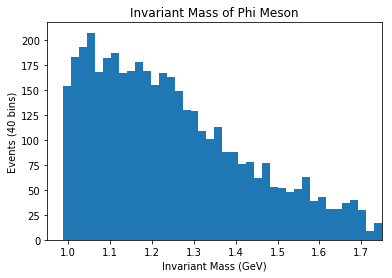

In [19]:
InvMassFiltered = [i for i in InvMass if i <= 1.75]
print min(InvMassFiltered)
n, bins, patches = plt.hist(InvMassFiltered, bins=40)
# could use numpy.polyfit, but needs x, y, and power of fit
plt.xlim([.95,1.75])
plt.ylabel("Events (40 bins)")
plt.xlabel("Invariant Mass (GeV)")
plt.title("Invariant Mass of Phi Meson")
plt.show()

In [20]:
print "--- %s seconds ---" % (time.time() - start_time)

--- 355.621494055 seconds ---


In [21]:
df_filtered.printSchema()

root
 |-- Runnr: integer (nullable = true)
 |-- Eventnr: integer (nullable = true)
 |-- Date1: integer (nullable = true)
 |-- Date2: integer (nullable = true)
 |-- Weight: float (nullable = true)
 |-- Evtake: integer (nullable = true)
 |-- Evtake_iwant: integer (nullable = true)
 |-- Mvdtake: integer (nullable = true)
 |-- Stttake: integer (nullable = true)
 |-- Tpoltake: integer (nullable = true)
 |-- Lpoltake: integer (nullable = true)
 |-- Fmutake: integer (nullable = true)
 |-- Mbtake: integer (nullable = true)
 |-- Tag6take: integer (nullable = true)
 |-- Itrig: integer (nullable = true)
 |-- Fltw: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Fltpsw: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Fltfl: integer (nullable = true)
 |-- Gslt_global: integer (nullable = true)
 |-- Sltw: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- Sltupw: array (nullable = true)
 |    |-- element: integer 

In [18]:
#def q2_filter(siecorr,sith):
#    try:
#        q2 = 4.0*27.5*siecorr[2]*((cos(sith)/2.0)**2.0)
#        if q2 < 2.0 and q2 > 70.0:
#            return False
#        else:
#            return True
#    except IndexError:
#       return False

def q2_filter(q2Array):
    try:
        if min(q2Array)>2:
            if max(q2Array)<70:
                return True
        return False
    except ValueError:
        return False
q2_udf = udf(q2_filter,BooleanType())
#df_filter2 = df_filtered.filter(q2_udf(df_filtered.Siecorr,df_filtered.Sith))
df_filter2 = df_filtered.filter(q2_udf(df_filtered.Siq2el))
df_filter2.count()    

0

In [19]:
df_filtered.select("Siq2el").show()

+--------------------+
|              Siq2el|
+--------------------+
|[34.10392, 1403.2...|
|[1086.5397, 739.3...|
|[1.8346361, 7.205...|
|[9.691471, 8.1584...|
|[21.342632, 311.1...|
|[265.93457, 176.8...|
|[1980.0089, 9.679...|
|[24.223696, 3.099...|
|[1.4151969, 7.207...|
+--------------------+



In [4]:
# data.foreach(function)
# data.foreachPartition(function)
# data.filter()
# udf

selection = data.filter(data.Sincand != 0)
print data.count()
print selection.count()
data.select("Vtx_prim").show()

182606
95946
+--------------------+
|            Vtx_prim|
+--------------------+
|                  []|
|                 [1]|
|                 [1]|
|              [1, 0]|
|              [1, 0]|
|                  []|
|                 [1]|
|                 [1]|
|              [1, 0]|
|     [1, 0, 0, 0, 0]|
|                 [1]|
|        [1, 0, 0, 0]|
|[1, 0, 0, 0, 0, 0...|
|                  []|
|                  []|
|                 [1]|
|           [1, 0, 0]|
|[1, 0, 0, 0, 0, 0...|
|                  []|
|              [1, 0]|
+--------------------+
only showing top 20 rows



In [5]:
def add_to_one(array):
    if sum(array)==1:
        return True
    return False
filter_udf = udf(add_to_one, BooleanType())
df_filtered = selection.filter(filter_udf(selection.Vtx_prim))
df_filtered.count()

76957

In [19]:
df_filtered.Remc

Column<Remc>

In [31]:
def rcal_energy(array):
    #return array[3]
    if array[3] > 2:
        return True
    return False
rcal_udf = udf(rcal_energy,BooleanType())
df_filtered.select("Remc").show()

#test = rcal_udf(df_filtered.Remc)
#print type(test)
#plz = data.withColumn("Test",test)
#plz.select("Test").show(5)

new = data.filter(rcal_udf(data.Remc))
new.count()

+--------------------+
|                Remc|
+--------------------+
|[-2.015098, 0.239...|
|[-1.1364275, 0.45...|
|[0.0666811, -0.04...|
|[-0.37364623, 0.3...|
|[-0.5059691, 1.14...|
|[0.50368035, -0.6...|
|[2.5757477, -1.14...|
|[-9.287206, -7.93...|
|[0.0, 0.0, 0.0, 0...|
|[0.25755203, 0.16...|
|[-3.6059341, 0.75...|
|[0.093001455, -0....|
|[2.6694465, -0.22...|
|[3.023202, 0.8400...|
|[-1.6509546, 1.25...|
|[2.517955, -1.681...|
|[2.9523737, -0.55...|
|[6.227952, 8.5111...|
|[-0.17670819, 0.2...|
|[0.020294249, -0....|
+--------------------+
only showing top 20 rows



121257

In [36]:
def Siprob_filter(array):
    if len(array) > 0:
        if max(array) > 0.9:
            return True
    return False

Siprob_udf = udf(Siprob_filter,BooleanType())
data.filter(Siprob_udf(data.Siprob)).count()

70183

In [40]:
# Need to Check!!  May be filtering too much here with wrong computation
data.select("Siecorr")
def Siecorr_filter(array):
    if len(array) > 0:
        try:
            if array[2] > 10:
                return True
        except IndexError:
                return False
    return False
Siecorr_udf = udf(Siecorr_filter,BooleanType())
data.filter(Siecorr_udf(data.Siecorr)).count()

1224

In [64]:
close = data.filter(rcal_udf(data.Remc) & Siprob_udf(data.Siprob) & Siecorr_udf(data.Siecorr))\
.filter(filter_udf(selection.Vtx_prim))

print close.count()
print close.select("Sincand")
close.select("Sincand").show(5)

933
DataFrame[Sincand: int]


Py4JJavaError: An error occurred while calling o1399.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 111.0 failed 1 times, most recent failure: Lost task 2.0 in stage 111.0 (TID 1302, localhost, executor driver): scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:333)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$org$apache$spark$sql$Dataset$$execute$1$1.apply(Dataset.scala:2386)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$execute$1(Dataset.scala:2385)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collect(Dataset.scala:2392)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2128)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.withTypedCallback(Dataset.scala:2818)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2342)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:248)
	at sun.reflect.GeneratedMethodAccessor114.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)


In [62]:
work = close.filter(close.Sincand != 0)
work.count()

Py4JJavaError: An error occurred while calling o1255.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 103.0 failed 1 times, most recent failure: Lost task 7.0 in stage 103.0 (TID 1205, localhost, executor driver): scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1965)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:275)
	at org.apache.spark.sql.Dataset$$anonfun$org$apache$spark$sql$Dataset$$execute$1$1.apply(Dataset.scala:2386)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$execute$1(Dataset.scala:2385)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collect(Dataset.scala:2392)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2420)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2419)
	at org.apache.spark.sql.Dataset.withCallback(Dataset.scala:2801)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:2419)
	at sun.reflect.GeneratedMethodAccessor111.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)


In [54]:
data.select('Sincand').distinct().show()

+-------+
|Sincand|
+-------+
|      1|
|      3|
|      4|
|      2|
+-------+



95946

In [57]:
close.select('Sincand').distinct().show()

Py4JJavaError: An error occurred while calling o1133.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 96.0 failed 1 times, most recent failure: Lost task 7.0 in stage 96.0 (TID 1118, localhost, executor driver): scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1925)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1951)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:333)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$org$apache$spark$sql$Dataset$$execute$1$1.apply(Dataset.scala:2386)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:57)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2788)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$execute$1(Dataset.scala:2385)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collect(Dataset.scala:2392)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2128)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.withTypedCallback(Dataset.scala:2818)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2127)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2342)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:248)
	at sun.reflect.GeneratedMethodAccessor114.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: scala.MatchError: 0 (of class java.lang.Integer)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:160)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$ArrayConverter.toCatalystImpl(CatalystTypeConverters.scala:154)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$CatalystTypeConverter.toCatalyst(CatalystTypeConverters.scala:103)
	at org.apache.spark.sql.catalyst.CatalystTypeConverters$$anonfun$createToCatalystConverter$2.apply(CatalystTypeConverters.scala:383)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:60)
	at org.apache.spark.sql.execution.RDDConversions$$anonfun$rowToRowRdd$1$$anonfun$apply$3.apply(ExistingRDD.scala:57)
	at scala.collection.Iterator$$anon$11.next(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIterator.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$8$$anon$1.hasNext(WholeStageCodegenExec.scala:377)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1126)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1132)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:408)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1336)
	at org.apache.spark.api.python.PythonRDD$.writeIteratorToStream(PythonRDD.scala:504)
	at org.apache.spark.api.python.PythonRunner$WriterThread$$anonfun$run$3.apply(PythonRDD.scala:328)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1951)
	at org.apache.spark.api.python.PythonRunner$WriterThread.run(PythonRDD.scala:269)


In [71]:
#sincand_filter = data.filter(data.Sincand != 0)
#print sincand_filter.count()
#filtered = sincand_filter.filter(rcal_udf(data.Remc) & Siprob_udf(data.Siprob) & Siecorr_udf(data.Siecorr))\
#.filter(filter_udf(selection.Vtx_prim))

# Runtime Calculation

In [59]:
#print "--- %s seconds ---" % (time.time() - start_time)